# Demo: Control of a reaction wheel

Import modules and configure the notebook.

In [1]:
# These are standard modules
import time
import numpy as np
import matplotlib.pyplot as plt

# This is a custom interface to the pybullet simulator
import ae353_wheel

Create an instance of the `Simulator` class, which is an interface to the [pybullet](http://pybullet.org) simulation engine.

There are two optional arguments:

* `display` (`True` or `False`) is whether or not to show the simulation window;
* `damping` (a non-negative floating-point number) is the coefficient of viscous friction at the wheel joint.

**You must evaluate this cell only *once*.** If you want to start fresh with a new simulator, you must do `Kernel -> Restart` from the notebook menu first. If you evaluate this cell more than once without a call to `Kernel -> Restart` then you may get strange behavior that is hard to debug.

In [2]:
simulator = ae353_wheel.Simulator(
    display=True,
    damping=0.,
)

Define a controller that maps sensor measurements (`wheel_angle` and `wheel_velocity`) to actuator commands (`wheel_torque`). By default, it chooses to apply zero torque to the wheel. Modify the `run` function to make the controller behave differently.

In [27]:
class Controller:
    def __init__(self):
        pass
    
    def reset(self):
        pass
    
    def run(self, t, wheel_angle, wheel_velocity):
        """
        INPUTS
         t = current time (s)
         wheel_angle = angle of wheel (rad)
         wheel_velocity = angular velocity of wheel (rad/s)
        
        OUTPUTS
         wheel_torque = torque applied to wheel by motor on ground (N m)
        """
        
        # FIXME: replace the following line
        wheel_torque = -1. * (wheel_velocity) - 1.*(wheel_angle-np.pi/2)
        
        return wheel_torque

Create an instance of the controller.

In [28]:
controller = Controller()

Reset the simulator. Optional arguments allow you to specify the initial wheel angle and velocity. If the value of either argument is `None` (or if the argument is left unspecified), then its value will be chosen at random.

In [39]:
simulator.reset(
    wheel_angle=0,
    wheel_velocity=30
)

Reset the controller.

In [40]:
controller.reset()

Choose a camera view (could be `simulator.camera_topview()` or `simulator.camera_sideview()`).

In [31]:
simulator.camera_topview()

Run the simulator.

In [41]:
data = simulator.run(
    controller,           # <-- required (an instance of your Controller class)
    max_time=5.0,         # <-- optional (how long you want to run the simulation in seconds)
    data_filename=None,   # <-- optional (name of file to which you want data saved, e.g., 'my_data.json')
    video_filename=None,  # <-- optional (name of file to which you want video saved, e.g., 'my_video.mov')
)

Simulated 500 time steps in 5.0100 seconds (99.8006 time steps per second)


Get, show, and save a snapshot of the simulation after the last time step.

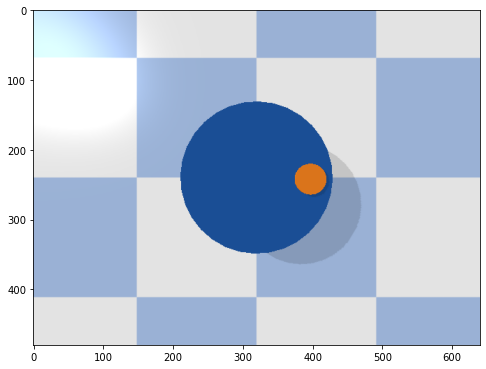

In [9]:
# Get snapshot as height x width x 4 numpy array of RGBA values
rgba = simulator.snapshot()

# Display snapshot
plt.figure(figsize=(8, 8))
plt.imshow(rgba)

# Save snapshot
plt.imsave('my_snapshot.png', rgba)

Plot the results.

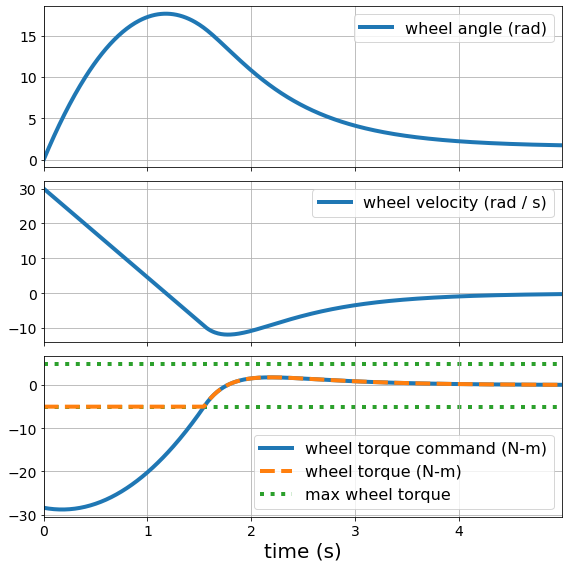

In [42]:
# Create a figure with three subplots, all of which share the same x-axis
fig, (ax_angle, ax_velocity, ax_torque) = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

# Plot wheel angle on first subplot
ax_angle.plot(
    data['t'], data['wheel_angle'],
    label='wheel angle (rad)', linewidth=4,
)
ax_angle.grid()
ax_angle.legend(fontsize=16)
ax_angle.tick_params(labelsize=14)

# Plot wheel velocity on second subplot
ax_velocity.plot(
    data['t'], data['wheel_velocity'],
    label='wheel velocity (rad / s)', linewidth=4,
)
ax_velocity.grid()
ax_velocity.legend(fontsize=16)
ax_velocity.tick_params(labelsize=14)

# Plot wheel torque on third subplot
ax_torque.plot(
    data['t'], data['wheel_torque_command'],
    label='wheel torque command (N-m)', linewidth=4,
)
ax_torque.plot(
    data['t'], data['wheel_torque'],
    '--', label='wheel torque (N-m)', linewidth=4,
)
ax_torque.plot(
    data['t'], np.ones_like(data['t']) * simulator.tau_max,
    ':', label='max wheel torque', linewidth=4, color='C2', zorder=0,
)
ax_torque.plot(
    data['t'], -np.ones_like(data['t']) * simulator.tau_max,
    ':', linewidth=4, color='C2', zorder=0,
)
ax_torque.grid()
ax_torque.legend(fontsize=16)
ax_torque.tick_params(labelsize=14)

# Set x-axis properties (only need to do this on the third
# subplot since all three subplots share the same x-axis)
ax_torque.set_xlabel('time (s)', fontsize=20)
ax_torque.set_xlim([data['t'][0], data['t'][-1]])

# Make the arrangement of subplots look nice
fig.tight_layout()

Save the figure (without transparent background).

In [11]:
fig.savefig('my_figure.png', facecolor='white', transparent=False)